<a href="https://colab.research.google.com/github/MonalSD/Attrition-Dashboard/blob/main/AttritionDashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_ter=pd.read_csv('C:/Users/DELL/Desktop/Summer Internship/PBS Termination Raw Data 2019-2022.csv')

In [ ]:
df_ter.dtypes

In [ ]:
df_headcount=pd.read_csv('C:/Users/DELL/Desktop/Summer Internship/PBS HC Raw Data 2019-2022 Month-wise.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_29148\4113826681.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_headcount=pd.read_csv('C:/Users/DELL/Desktop/Summer Internship/PBS HC Raw Data 2019-2022 Month-wise.csv')


In [ ]:
df_headcount.dtypes

Global ID                          int64
Personnel number                   int64
First name                        object
Last name                         object
Employee name                     object
                                  ...   
Analysis Block L4 Description    float64
Analysis Block L5 Code           float64
Analysis Block L5 Description    float64
load_month                         int64
load_year                          int64
Length: 140, dtype: object

In [ ]:
df_movement=pd.read_excel('C:/Users/DELL/Desktop/Summer Internship/PBS Movements Report 2019-2022.xlsx')

In [ ]:
df_movement.columns.to_list()

['Applied filters:\ncompany_id is IN11\nYear is 2019, 2020, 2021, or 2022\nlocal_entity_description is PBS',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 'Unnamed: 52',
 'Unnamed: 53',
 'Unnamed: 54',
 'Unnamed: 55',
 'Unnamed: 56',
 'Un

In [ ]:
df_movement
df_movement.columns = df_movement.iloc[1]
df_movement = df_movement.drop(1)
df_movement = df_movement.reset_index(drop=True)

In [ ]:
df_movement.drop(0,inplace=True)

In [ ]:
df_movement['Global ID']=df_movement['Global ID'].astype('int64')

In [ ]:
termination_ids=df_ter['Global ID']

df_ter['Time in Role']=pd.NA
df_ter['Time in Band']=pd.NA
df_ter['TAScore']=pd.NA
df_ter['Manager Effectiveness Score']=0
df_ter['Communication & Collaboration']=0
df_ter['Diversity & Inclusion']=0
df_ter['Growth & Development Opportunities']=0
df_ter['Recognition & Rewards']=0


In [ ]:
ter_month={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
df_ter['Termination Month']=df_ter['Termination Month'].map(ter_month)

In [ ]:
def findTimeInBandandTimeInRole(df_ter,df_headcount):
    termination_month=df_ter.iloc[0]['Termination Month']
    termination_year=df_ter.iloc[0]['Termination Year']
    if(termination_month!=1):
        data=df_headcount[(df_headcount['load_year']==termination_year) & (df_headcount['load_month']==termination_month-1)]
        if(data.empty):
            return pd.NA,pd.NA
        else:
            return data.iloc[0]['Time in Role (Days)'],data.iloc[0]['Time in band (Years)']
    else:
        data=df_headcount[(df_headcount['load_year']==termination_year-1)&(df_headcount['load_month']==12)]
        if(data.empty):
            return pd.NA,pd.NA
        else:
            return data.iloc[0]['Time in Role (Days)'],data.iloc[0]['Time in band (Years)']

In [ ]:
def findMovement(movement_rows:pd.DataFrame):
    movs={"Lateral Move":0,'Promotion within band':0,'Promotion - Band Up':0}
    for mov in movs:
        movs[mov]=len(movement_rows[movement_rows['Reason for Action'].str.strip()==mov])
    return movs

In [ ]:
def findTA(ta_rows:pd.DataFrame):
    ta={2018:0,2019:0,2020:0,2021:0}
    for tas in ta:
        a=(ta_rows[ta_rows['Year']==tas])
        if(not a.empty):
            ta[tas]=a.iloc[0]['TA Score']
    return ta

In [ ]:
df_engagement=pd.read_excel('C:/Users/DELL/Desktop/Summer Internship/EngagementDataFinal.xlsx')

In [ ]:
df_ter['TAScore']

0      <NA>
1      <NA>
2      <NA>
3      <NA>
4      <NA>
       ... 
140    <NA>
141    <NA>
142    <NA>
143    <NA>
144    <NA>
Name: TAScore, Length: 145, dtype: object

In [ ]:
df_ter['TimeinRole(Yrs)']=df_ter['Time in Role']/365

df_ter['TimeinRole(Yrs)'].fillna(0,inplace=True)

In [ ]:
np.median(df_ter['TimeinRole(Yrs)'])

0.0

In [ ]:
df_ter.head()

,Personnel Number,Global ID,Employee Name,Position ID,Position Name,Original Hire Date,Employee Band,Gender,Last Day Worked,Termination Date,...,Time in Band,Movements,Time in Role,TAScore,Manager Effectiveness Score,Communication & Collaboration,Diversity & Inclusion,Growth & Development Opportunities,Recognition & Rewards,TimeinRole(Yrs)
0,40052619,40052619,VIGHNESH B,10771119,Analyst - PBS,6/5/2017 0:00,VIII-B,MALE,11/22/2019 0:00,11/23/2019 0:00,...,<NA>,NaN,<NA>,<NA>,0,0,0,0,0,0
1,40052629,40052629,Ranjitha KUMAR,10771125,Principal Analyst - Rewards,6/5/2017 0:00,VII-B,FEMALE,5/10/2019 0:00,5/11/2019 0:00,...,<NA>,NaN,<NA>,<NA>,0,0,0,0,0,0
2,40052631,40052631,Sahil AGGARWAL,10714360,Principal Analyst - PBS,6/7/2017 0:00,VII-B,MALE,8/2/2019 0:00,8/3/2019 0:00,...,<NA>,NaN,<NA>,<NA>,0,0,0,0,0,0
3,40053005,40053005,Sneha AR,10771118,Analyst - PBS,3/13/2018 0:00,VIII-B,FEMALE,1/10/2020 0:00,1/11/2020 0:00,...,<NA>,NaN,<NA>,<NA>,0,0,0,0,0,0
4,40100202,40100202,Lincoln VICTOR,10521640,Manager - PBS,8/1/2017 0:00,VI-B,MALE,11/8/2019 0:00,11/9/2019 0:00,...,<NA>,NaN,<NA>,<NA>,0,0,0,0,0,0


In [ ]:
####df_ter.to_csv("outputpowerBI.csv",index=False)

In [ ]:
import os

In [ ]:
os.getcwd()

'C:\\Users\\DELL'

In [ ]:
df_ta=pd.read_excel('C:/Users/DELL/Desktop/Summer Internship/TA_Data_Historical.xlsx')

In [ ]:
df_ta

,Global ID,TA Score,Year
0,1001,0.0,2021
1,1003,0.0,2021
2,1012,95.0,2021
3,1015,0.0,2021
4,5131022,84.3,2020
...,...,...,...
6324,99826779,94.0,2021
6325,99826780,97.0,2021
6326,99826782,100.0,2021
6327,99826813,100.0,2021


In [ ]:
####Storyline1-TimeinPosition> 18months######
df_ter['Storyline1']=[1 if row>=1.5 else 0 for row in df_ter['Time in Position'] ]

####Storyline2-TimeinPosition between 12 to 24 months#######
df_ter['Storyline2']=[1 if row>=1.0 and row<=2.0 else 0 for row in df_ter['Time in Position']]

#####Storyline3-TimeinCompany Less than 1 year#########
df_ter['Storyline3']=[1 if row<=1.0  else 0 for row in df_ter['Time with Company (Yrs)']]

#####Storyline4-TimeinRole More than 0.81-Median value#########
df_ter['Storyline4']=[1 if row>=0.81  else 0 for row in df_ter['TimeinRole(Yrs)']]



In [ ]:
df_opr=pd.read_excel('C:/Users/DELL/Desktop/Summer Internship/OPR_Data_Historical.xlsx')
df_CA=pd.read_excel('C:/Users/DELL/Desktop/Summer Internship/CA_Data_Historical.xlsx')

In [ ]:
for key in termination_ids:
        termination_row=df_ter[df_ter['Global ID']==key]
        headCount_rows=df_headcount[df_headcount['Global ID']==key]
        if(not headCount_rows.empty):
            res=findTimeInBandandTimeInRole(termination_row,headCount_rows)
            df_ter.loc[df_ter['Global ID']==key,['Time in Role','Time in Band']]=res
           
        movement_rows=df_movement[df_movement['Global ID']==key]
        if(not movement_rows.empty):
            movs=findMovement(movement_rows)

            df_ter.loc[df_ter['Global ID']==key,movs.keys()]=movs.values()
        
                       
        engagement_row=df_engagement[(df_engagement['Global ID']==termination_row.iloc[0]['Manager Global ID']) & (df_engagement['Year']==termination_row.iloc[0]['Termination Year'])]   
        if(not engagement_row.empty):
            ##engagement_row[['Manager Effectiveness Index','Communication & Collaboration','Diversity & Inclusion','Growth & Development Opportunities','Recognition & Rewards']].mean(axis=0)
            df_ter.loc[df_ter['Global ID']==key,['Manager Effectiveness Score','Communication & Collaboration','Diversity & Inclusion','Growth & Development Opportunities','Recognition & Rewards']]=engagement_row[['Manager Effectiveness Index','Communication & Collaboration','Diversity & Inclusion','Growth & Development Opportunities','Recognition & Rewards']].mean(axis=0).to_list()
            
        
        
        ta_row=df_ta[(df_ta['Global ID']==key) & (df_ta['Year']==(termination_row.iloc[0]['Termination Year']-1))]
        if(not ta_row.empty):
            df_ter.loc[df_ter['Global ID']==key,"TAScore"]=ta_row.iloc[0]['TA Score']
        
        opr_row=df_opr[(df_opr['Employee ID']==key) & (df_opr['Year']==(termination_row.iloc[0]['Termination Year']-1) if(termination_row.iloc[0]['Termination Month']<=6) else (termination_row.iloc[0]['Termination Year']) )]
        if(not opr_row.empty):
            df_ter.loc[df_ter['Global ID']==key,"OPR_Score"]=opr_row.iloc[0]['OPR Score']
        CA_row=df_CA[(df_CA['Global ID']==key) & (df_CA['Year']==(termination_row.iloc[0]['Termination Year']-1) if(termination_row.iloc[0]['Termination Month']<=3) else (termination_row.iloc[0]['Termination Year']) )]
        if(not CA_row.empty):
            df_ter.loc[df_ter['Global ID']==key,"CA_Score"]=CA_row.iloc[0]['CA Score']

In [ ]:
df_engagement

,Manager Hierarchy Group,N-Size,Level,Zone,Position ID,Global ID,Function,Manager Effectiveness Index,Year,Communication & Collaboration,Diversity & Inclusion,Growth & Development Opportunities,Recognition & Rewards
0,ARUN JACOB MATHEWS ORGANIZATION,20.0,6.0,GHQ,10682911.0,40100595,Procurement,81.000000,2019,75.000000,85.000000,80.000000,68.000000
1,ARUN JACOB MATHEWS DIRECT REPORTS,6.0,7.0,GHQ,10682911.0,40100595,Procurement,96.666666,2019,89.999998,100.000002,86.666663,86.666665
2,NINAD PHATARPEKAR ORGANIZATION,42.0,6.0,GHQ,10682913.0,40102212,Procurement,64.157955,2019,76.933797,77.619048,75.133565,64.599303
3,KARTHIK SEGAR GUNASEKARAN ORGANIZATION,5.0,7.0,GHQ,10682975.0,40100642,Procurement,80.000000,2019,84.000000,88.000000,92.000000,72.000000
4,SAJITH KURUP ORGANIZATION,26.0,6.0,GHQ,10743262.0,40100262,Solutions,92.307690,2019,90.000000,93.846152,94.615385,81.538461
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,Vikas Bhatnagar,NaN,NaN,NaN,NaN,40102388,NaN,80.750000,2021,NaN,89.000000,67.000000,89.000000
352,Vinay Kumble,NaN,NaN,NaN,NaN,40101658,NaN,96.750000,2021,NaN,93.000000,87.000000,87.000000
353,Vinod Elangovan,NaN,NaN,NaN,NaN,40100138,NaN,82.000000,2021,NaN,93.000000,57.000000,71.000000
354,Vivek Kumar,NaN,NaN,NaN,NaN,40100828,NaN,85.000000,2021,NaN,80.000000,70.000000,70.000000


In [ ]:
df_cutoff=df_engagement[['Year','Recognition & Rewards']].groupby('Year').describe()

In [ ]:
df_ter

NameError: name 'df_ter' is not defined

In [ ]:
def maneffcutoff(row):
    if row['Termination Year']==2019 and row['Manager Effectiveness Score'] != 0:
        return 65
    if row['Termination Year']==2020 and row['Manager Effectiveness Score'] != 0:
        return 80
    if row['Termination Year']==2021 and row['Manager Effectiveness Score'] != 0:
        return 81
    else:
        return np.NAN

In [ ]:
df_ter['ManEffCutoff']=df_ter.apply(maneffcutoff,axis=1)

In [ ]:
#####Storyline5-Manager Effectiveness Index less than Cutoff#########

df_ter['Storyline5']=[1 if x<y  else 0 for x,y in zip(df_ter['Manager Effectiveness Score'],df_ter['ManEffCutoff'])]

In [ ]:
df_ter.columns.to_list()

['Personnel Number',
 'Global ID',
 'Employee Name',
 'Position ID',
 'Position Name',
 'Original Hire Date',
 'Employee Band',
 'Gender',
 'Last Day Worked',
 'Termination Date',
 'Termination Year',
 'Name of Action Type',
 'Reason for action',
 'Local Entity Description',
 'Local Entity L2 Description',
 'Local Entity L3 Description',
 'Manager Name',
 'Position Start Date',
 'Employee Group Name',
 'New Hire',
 'Analysis Block Description',
 'Analysis Block L1 Description',
 'Analysis Block L2 Description',
 'Analysis Block L3 Description',
 'Analysis Block L4 Description',
 'Cost Center',
 'Cost Center Text',
 'Inbev Entity Description',
 'Inbev Entity L2 Description',
 'Inbev Entity L3 Description',
 'Functional Area',
 'Company Code',
 'Company Code Description',
 'Personnel Area Code',
 'Personnel Area Text',
 'Employee Personnel Subarea Code',
 'Personnel Subarea Text',
 'Employee Subgroup Code',
 'Employee Subgroup Text',
 'Employee Group Code',
 'Org Unit Code',
 'Org Unit T

In [ ]:
df_ter['Recognition & Rewards'].unique()

array([ 51.11110992,   0.        ,  69.09090805,  55.55555344,
        80.        ,  64.6153841 ,  80.21978022,  83.33333333,
        77.77777778, 100.        ,  66.66666667,  84.44444275,
        63.1818181 ,  85.        ,  81.        ,  79.18918919])

In [ ]:
def Communication_Collaboration(row):
    if row['Termination Year']==2019 and row['Communication & Collaboration'] !=0 and row['Communication & Collaboration'] != np.NAN:
        return 72
    if row['Termination Year']==2020 and row['Communication & Collaboration'] !=0 and row['Communication & Collaboration'] != np.NAN:
        return 83
    if row['Termination Year']==2021 and row['Communication & Collaboration'] !=0 and row['Communication & Collaboration'] != np.NAN:
        return np.NAN
    else:
        return np.NAN

In [ ]:
df_ter['CommCollabCutoff']=df_ter.apply(Communication_Collaboration,axis=1)

In [ ]:
#####Storyline6-Communication & Collaboration Index Score  less than Cutoff#########

df_ter['Storyline6']=[1 if x<y  else 0 for x,y in zip(df_ter['Communication & Collaboration'],df_ter['CommCollabCutoff'])]

In [ ]:
def Diversity_Inclusion(row):
    if row['Termination Year']==2019 and row['Diversity & Inclusion'] !=0:
        return 75
    if row['Termination Year']==2020 and row['Diversity & Inclusion'] !=0:
        return 82
    if row['Termination Year']==2021 and row['Diversity & Inclusion'] !=0:
        return 80
    else:
        return np.NAN

In [ ]:
df_ter['DivInclusionCutoff']=df_ter.apply(Diversity_Inclusion,axis=1)

In [ ]:
#####Storyline7-Diversity Inclusion Index Score  less than Cutoff#########

df_ter['Storyline7']=[1 if x<y  else 0 for x,y in zip(df_ter['Diversity & Inclusion'],df_ter['DivInclusionCutoff'])]

In [ ]:
def growth_development(row):
    if row['Termination Year']==2019 and row['Growth & Development Opportunities'] !=0:
        return 74
    if row['Termination Year']==2020 and row['Growth & Development Opportunities'] !=0:
        return 78
    if row['Termination Year']==2021 and row['Growth & Development Opportunities'] !=0:
        return 62
    else:
        return np.NAN

In [ ]:
df_ter['growthDevCutoff']=df_ter.apply(growth_development,axis=1)

In [ ]:
#####Storyline8-Growth & Development Score  less than Cutoff#########

df_ter['Storyline8']=[1 if x<y  else 0 for x,y in zip(df_ter['Growth & Development Opportunities'],df_ter['growthDevCutoff'])]

In [ ]:
def rewards_recognition(row):
    if row['Termination Year']==2019 and row['Recognition & Rewards'] !=0:
        return 65
    if row['Termination Year']==2020 and row['Recognition & Rewards'] !=0:
        return 66
    if row['Termination Year']==2021 and row['Recognition & Rewards'] !=0:
        return 70
    else:
        return np.NAN

In [ ]:
df_ter['Rewards_Cutoff']=df_ter.apply(rewards_recognition,axis=1)

In [ ]:
#####Storyline9-Satisified with Rewards & Recognition  Score  less than Cutoff#########

df_ter['Storyline9']=[1 if x<y  else 0 for x,y in zip(df_ter['Recognition & Rewards'],df_ter['Rewards_Cutoff'])]

In [ ]:
df_tacutoff=df_ta[['Year','TA Score']].groupby('Year').describe()

In [ ]:
df_tacutoff

TA Score                                                      
        count       mean        std  min   25%    50%    75%    max
Year                                                               
2018   1212.0  83.637871  20.710573  0.0  75.0   92.0  100.0  100.0
2019   1360.0  85.666570  18.246004  0.0  83.5   92.0   97.0  110.0
2020   1601.0  92.853513  13.873309  0.0  94.0  100.0  100.0  100.0
2021   2156.0  93.191095  21.598909  0.0  97.0  100.0  100.0  100.0

In [ ]:
df_ter['TAScore']=df_ter['TAScore'].replace(np.NAN,0)

In [ ]:
def tacutoff(row):
    if row['Termination Year']==2018 and row['TAScore'] != np.NAN and row['TAScore'] != 0 :
        return 92
    if row['Termination Year']==2019 and row['TAScore'] != np.NAN and row['TAScore'] != 0 :
        return 92
    if row['Termination Year']==2020 and row['TAScore'] != np.NAN and row['TAScore'] != 0 :
        return 100
    if row['Termination Year']==2021 and row['TAScore'] != np.NAN and row['TAScore'] != 0 :
        return 100
    else:
        return 0

In [ ]:
df_ter['TA_Cutoff']=df_ter.apply(tacutoff,axis=1)

In [ ]:
def CAcutoff(row):
    if row['Termination Year']==2018 and row['CA_Score'] != np.NAN and row['CA_Score'] != 0 :
        return 3.17
    if row['Termination Year']==2019 and row['CA_Score'] != np.NAN and row['CA_Score'] != 0 :
        return 3.25
    if row['Termination Year']==2020 and row['CA_Score'] != np.NAN and row['CA_Score'] != 0 :
        return 3.11
    if row['Termination Year']==2021 and row['CA_Score'] != np.NAN and row['CA_Score'] != 0 :
        return 3.40
    else:
        return 0

In [ ]:
df_ter['CA_Cutoff']=df_ter.apply(CAcutoff,axis=1)

In [ ]:
df_ter['Top_talent'] = np.where( ( (df_ter['TAScore'] >= df_ter['TA_Cutoff']) & (df_ter['CA_Score'] > df_ter['CA_Cutoff'] ) & (df_ter['OPR_Score'] == 'E' ) | (df_ter['OPR_Score'] == 'M' ) ) , 1, 0)

In [ ]:
df_ter.columns.to_list()

['Personnel Number',
 'Global ID',
 'Employee Name',
 'Position ID',
 'Position Name',
 'Original Hire Date',
 'Employee Band',
 'Gender',
 'Last Day Worked',
 'Termination Date',
 'Termination Year',
 'Name of Action Type',
 'Reason for action',
 'Local Entity Description',
 'Local Entity L2 Description',
 'Local Entity L3 Description',
 'Manager Name',
 'Position Start Date',
 'Employee Group Name',
 'New Hire',
 'Analysis Block Description',
 'Analysis Block L1 Description',
 'Analysis Block L2 Description',
 'Analysis Block L3 Description',
 'Analysis Block L4 Description',
 'Cost Center',
 'Cost Center Text',
 'Inbev Entity Description',
 'Inbev Entity L2 Description',
 'Inbev Entity L3 Description',
 'Functional Area',
 'Company Code',
 'Company Code Description',
 'Personnel Area Code',
 'Personnel Area Text',
 'Employee Personnel Subarea Code',
 'Personnel Subarea Text',
 'Employee Subgroup Code',
 'Employee Subgroup Text',
 'Employee Group Code',
 'Org Unit Code',
 'Org Unit T

In [ ]:
df1=df_ter[['Top_talent','Termination Year','Termination Month']].groupby(['Termination Year','Termination Month']).count()

<AxesSubplot:xlabel='Termination Year,Termination Month'>

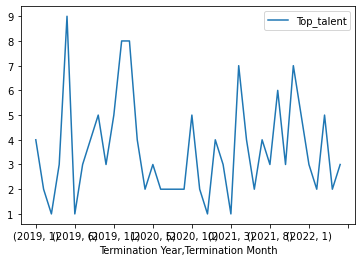

In [ ]:
df1.plot()

In [ ]:
df1_rolling=df1.rolling(window=5).mean()

<AxesSubplot:xlabel='Termination Year,Termination Month'>

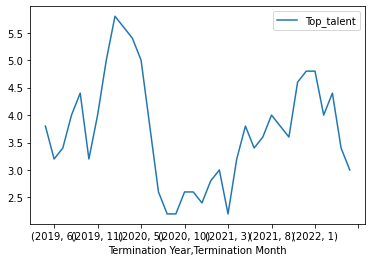

In [ ]:
df1_rolling.plot()

In [ ]:
df1_base['Last_month']=df1_base['Top_talent'].shift(+1)
df1_base['Last2_month']=df1_base['Top_talent'].shift(+2)
df1_base['Last3_month']=df1_base['Top_talent'].shift(+3)

In [ ]:
df1_base.drop('Forecast_Talent',axis=1,inplace=True)

In [ ]:
df1_base.dropna(inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
x1,x2,x3,y=df1_base['Last_month'],df1_base['Last2_month'],df1_base['Last3_month'],df1_base['Top_talent']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
train_X=np.concatenate((x1,x2,x3),axis=1)
print(train_X)

[[1. 2. 4.]
 [3. 1. 2.]
 [9. 3. 1.]
 [1. 9. 3.]
 [3. 1. 9.]
 [4. 3. 1.]
 [5. 4. 3.]
 [3. 5. 4.]
 [5. 3. 5.]
 [8. 5. 3.]
 [8. 8. 5.]
 [4. 8. 8.]
 [2. 4. 8.]
 [3. 2. 4.]
 [2. 3. 2.]
 [2. 2. 3.]
 [2. 2. 2.]
 [2. 2. 2.]
 [5. 2. 2.]
 [2. 5. 2.]
 [1. 2. 5.]
 [4. 1. 2.]
 [3. 4. 1.]
 [1. 3. 4.]
 [7. 1. 3.]
 [4. 7. 1.]
 [2. 4. 7.]
 [4. 2. 4.]
 [3. 4. 2.]
 [6. 3. 4.]
 [3. 6. 3.]
 [7. 3. 6.]
 [5. 7. 3.]
 [3. 5. 7.]
 [2. 3. 5.]
 [5. 2. 3.]
 [2. 5. 2.]]


In [ ]:
model.fit(train_X,y)

LinearRegression()

In [ ]:
model.coef_

array([[ 0.06366581, -0.10077538,  0.09265694]])

In [ ]:
a=model.predict([[2,2,5],[2,2,2]])

In [ ]:
df1_base

Top_talent  Last_month  Last2_month  \
Termination Year Termination Month                                        
2019             4                           3         1.0          2.0   
                 5                           9         3.0          1.0   
                 6                           1         9.0          3.0   
                 7                           3         1.0          9.0   
                 8                           4         3.0          1.0   
                 9                           5         4.0          3.0   
                 10                          3         5.0          4.0   
                 11                          5         3.0          5.0   
                 12                          8         5.0          3.0   
2020             1                           8         8.0          5.0   
                 2                           4         8.0          8.0   
                 4                           2         4.0          8.0   
                 5                           3         2.0          4.0   
                 6                           2         3.0          2.0   
                 7                           2         2.0          3.0   
                 8                           2         2.0          2.0   
                 9                           2         2.0          2.0   
                 10                          5         2.0          2.0   
                 11                          2         5.0          2.0   
                 12                          1         2.0          5.0   
2021             1                           4         1.0          2.0   
                 2                           3         4.0          1.0   
                 3                           1         3.0          4.0   
                 4                           7         1.0          3.0   
                 5                           4         7.0          1.0   
                 6                           2         4.0          7.0   
                 7                           4         2.0          4.0   
                 8                           3         4.0          2.0   
                 9                           6         3.0          4.0   
                 10                          3         6.0          3.0   
                 11                          7         3.0          6.0   
                 12                          5         7.0          3.0   
2022             1                           3         5.0          7.0   
                 2                           2         3.0          5.0   
                 3                           5         2.0          3.0   
                 4                           2         5.0          2.0   
                 5                           3         2.0          5.0   

                                    Last3_month  
Termination Year Termination Month               
2019             4                          4.0  
                 5                          2.0  
                 6                          1.0  
                 7                          3.0  
                 8                          9.0  
                 9                          1.0  
                 10                         3.0  
                 11                         4.0  
                 12                         5.0  
2020             1                          3.0  
                 2                          5.0  
                 4                          8.0  
                 5                          8.0  
                 6                          4.0  
                 7                          2.0  
                 8                          3.0  
                 9                          2.0  
                 10                         2.0  
                 11                         2.0  
                 12                         2.0  
2021      

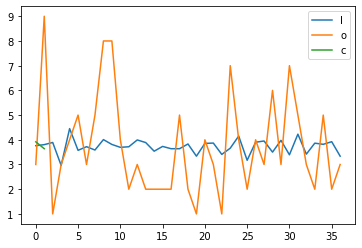

In [ ]:
pred=model.predict(train_X)
import matplotlib.pyplot as plt
plt.plot(pred,label='Predictions Top Talent')
plt.plot(y,label='Actual Top Talent Loss')
plt.plot(a,label='Forecast')
plt.legend("loc=upper left")
plt.show()

In [ ]:
df1_base

Top_talent  Last_month  Last2_month  \
Termination Year Termination Month                                        
2019             4                           3         1.0          2.0   
                 5                           9         3.0          1.0   
                 6                           1         9.0          3.0   
                 7                           3         1.0          9.0   
                 8                           4         3.0          1.0   
                 9                           5         4.0          3.0   
                 10                          3         5.0          4.0   
                 11                          5         3.0          5.0   
                 12                          8         5.0          3.0   
2020             1                           8         8.0          5.0   
                 2                           4         8.0          8.0   
                 4                           2         4.0          8.0   
                 5                           3         2.0          4.0   
                 6                           2         3.0          2.0   
                 7                           2         2.0          3.0   
                 8                           2         2.0          2.0   
                 9                           2         2.0          2.0   
                 10                          5         2.0          2.0   
                 11                          2         5.0          2.0   
                 12                          1         2.0          5.0   
2021             1                           4         1.0          2.0   
                 2                           3         4.0          1.0   
                 3                           1         3.0          4.0   
                 4                           7         1.0          3.0   
                 5                           4         7.0          1.0   
                 6                           2         4.0          7.0   
                 7                           4         2.0          4.0   
                 8                           3         4.0          2.0   
                 9                           6         3.0          4.0   
                 10                          3         6.0          3.0   
                 11                          7         3.0          6.0   
                 12                          5         7.0          3.0   
2022             1                           3         5.0          7.0   
                 2                           2         3.0          5.0   
                 3                           5         2.0          3.0   
                 4                           2         5.0          2.0   
                 5                           3         2.0          5.0   

                                    Last3_month  
Termination Year Termination Month               
2019             4                          4.0  
                 5                          2.0  
                 6                          1.0  
                 7                          3.0  
                 8                          9.0  
                 9                          1.0  
                 10                         3.0  
                 11                         4.0  
                 12                         5.0  
2020             1                          3.0  
                 2                          5.0  
                 4                          8.0  
                 5                          8.0  
                 6                          4.0  
                 7                          2.0  
                 8                          3.0  
                 9                          2.0  
                 10                         2.0  
                 11                         2.0  
                 12                         2.0  
2021      

In [ ]:
active_ids=pd.Series(list(set(df_headcount['Global ID'].unique()).difference(set(df_ter['Global ID']))))

In [ ]:
import datetime
current_date=datetime.datetime.now()
df_active=pd.DataFrame(active_ids,columns=['Global ID'])

In [ ]:
if(current_date.month!=1):
    df_active['Termination Month']=current_date.month-1
    df_active['Termination Year']=current_date.year
else:
    df_active['Termination Month']=12
    df_active['Termination Year']=current_date.year-1
df_active['isTalent']=0

In [ ]:
def findManagerOfActive(active_row,headCount_rows):
    termination_month=active_row.iloc[0]['Termination Month']
    termination_year=active_row.iloc[0]['Termination Year']
    manager_id=headCount_rows[(headCount_rows['load_year']==termination_year) & (headCount_rows['load_month']==termination_month)]
    if(manager_id.empty):
        return pd.NA
    return manager_id.iloc[0]['Direct Manager ID']

In [ ]:
df_engagement

,Manager Hierarchy Group,N-Size,Level,Zone,Position ID,Global ID,Function,Manager Effectiveness Index,Year,Communication & Collaboration,Diversity & Inclusion,Growth & Development Opportunities,Recognition & Rewards
0,ARUN JACOB MATHEWS ORGANIZATION,20.0,6.0,GHQ,10682911.0,40100595,Procurement,81.000000,2019,75.000000,85.000000,80.000000,68.000000
1,ARUN JACOB MATHEWS DIRECT REPORTS,6.0,7.0,GHQ,10682911.0,40100595,Procurement,96.666666,2019,89.999998,100.000002,86.666663,86.666665
2,NINAD PHATARPEKAR ORGANIZATION,42.0,6.0,GHQ,10682913.0,40102212,Procurement,64.157955,2019,76.933797,77.619048,75.133565,64.599303
3,KARTHIK SEGAR GUNASEKARAN ORGANIZATION,5.0,7.0,GHQ,10682975.0,40100642,Procurement,80.000000,2019,84.000000,88.000000,92.000000,72.000000
4,SAJITH KURUP ORGANIZATION,26.0,6.0,GHQ,10743262.0,40100262,Solutions,92.307690,2019,90.000000,93.846152,94.615385,81.538461
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,Vikas Bhatnagar,NaN,NaN,NaN,NaN,40102388,NaN,80.750000,2021,NaN,89.000000,67.000000,89.000000
352,Vinay Kumble,NaN,NaN,NaN,NaN,40101658,NaN,96.750000,2021,NaN,93.000000,87.000000,87.000000
353,Vinod Elangovan,NaN,NaN,NaN,NaN,40100138,NaN,82.000000,2021,NaN,93.000000,57.000000,71.000000
354,Vivek Kumar,NaN,NaN,NaN,NaN,40100828,NaN,85.000000,2021,NaN,80.000000,70.000000,70.000000


In [ ]:
df_engagement

,Manager Hierarchy Group,N-Size,Level,Zone,Position ID,Global ID,Function,Manager Effectiveness Index,Year,Communication & Collaboration,Diversity & Inclusion,Growth & Development Opportunities,Recognition & Rewards
0,ARUN JACOB MATHEWS ORGANIZATION,20.0,6.0,GHQ,10682911.0,40100595,Procurement,81.000000,2019,75.000000,85.000000,80.000000,68.000000
1,ARUN JACOB MATHEWS DIRECT REPORTS,6.0,7.0,GHQ,10682911.0,40100595,Procurement,96.666666,2019,89.999998,100.000002,86.666663,86.666665
2,NINAD PHATARPEKAR ORGANIZATION,42.0,6.0,GHQ,10682913.0,40102212,Procurement,64.157955,2019,76.933797,77.619048,75.133565,64.599303
3,KARTHIK SEGAR GUNASEKARAN ORGANIZATION,5.0,7.0,GHQ,10682975.0,40100642,Procurement,80.000000,2019,84.000000,88.000000,92.000000,72.000000
4,SAJITH KURUP ORGANIZATION,26.0,6.0,GHQ,10743262.0,40100262,Solutions,92.307690,2019,90.000000,93.846152,94.615385,81.538461
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,Vikas Bhatnagar,NaN,NaN,NaN,NaN,40102388,NaN,80.750000,2021,NaN,89.000000,67.000000,89.000000
352,Vinay Kumble,NaN,NaN,NaN,NaN,40101658,NaN,96.750000,2021,NaN,93.000000,87.000000,87.000000
353,Vinod Elangovan,NaN,NaN,NaN,NaN,40100138,NaN,82.000000,2021,NaN,93.000000,57.000000,71.000000
354,Vivek Kumar,NaN,NaN,NaN,NaN,40100828,NaN,85.000000,2021,NaN,80.000000,70.000000,70.000000


In [ ]:
for ids in active_ids:
    active_row=df_active[df_active['Global ID']==ids]
    headCount_rows=df_headcount[df_headcount['Global ID']==ids]
#     print(headCount_rows[['load_year','load_month']])
    manager_id=findManagerOfActive(active_row,headCount_rows)
    df_active.loc[df_active['Global ID']==ids,'Manager Global ID']=manager_id
    if(not headCount_rows.empty):
        res=findTimeInBandandTimeInRole(active_row,headCount_rows)
    else:
        res=[0,0]
    df_active.loc[df_active['Global ID']==ids,['Time in Role','Time in Band']]=res
    movement_rows=df_movement[df_movement['Global ID']==ids]
    if(not movement_rows.empty):
        movs=findMovement(movement_rows)
    else:
        movs={"Lateral Move":0,'Promotion within band':0,'Promotion - Band Up':0}
    df_active.loc[df_active['Global ID']==ids,movs.keys()]=movs.values()
    engagement_row=df_engagement[(df_engagement['Global ID']==active_row.iloc[0]['Manager Global ID']) & (df_engagement['Year']==active_row.iloc[0]['Termination Year']-1)]   
    if(not engagement_row.empty):
        row=engagement_row[['Manager Effectiveness Index','Communication & Collaboration','Diversity & Inclusion','Recognition & Rewards','Growth & Development Opportunities']]
    else:
        row=pd.Series([0,0,0,0,0])
    row=row.to_numpy()
    df_active.loc[df_active['Global ID']==ids,['Manager Effectiveness Index','Communication & Collaboration','Diversity & Inclusion','Recognition & Rewards','Growth & Development Opportunities']]=row
    ta_rows=df_ta[df_ta['Global ID']==ids]
    if(not ta_rows.empty):
        df_active.loc[df_active['Global ID']==ids,"TA_Score"]=(ta_rows['TA Score'].mean(axis=0))        
    opr_row=df_opr[(df_opr['Employee ID']==ids) & (df_opr['Year']==(active_row.iloc[0]['Termination Year']-1) if(active_row.iloc[0]['Termination Month']<=6) else (active_row.iloc[0]['Termination Year']) )]
    if(not opr_row.empty):
        df_active.loc[df_active['Global ID']==ids,"OPR_Score"]=opr_row.iloc[0]['OPR Score']
        
    timeincompany_row=df_headcount[(df_headcount['Global ID']==ids) & (df_headcount['load_year']==2022) & (df_headcount['load_month']==5)]
    if(not timeincompany_row.empty):
        df_active.loc[df_active['Global ID']==ids,"TimeinCompany(Yrs)"]=timeincompany_row.iloc[0]['Time with Company (Yrs)']
    CA_rows=df_CA[(df_CA['Global ID']==ids)]
    if(not CA_rows.empty):
        year=(active_row.iloc[0]['Termination Year']-1) if(active_row.iloc[0]['Termination Month']<=3) else (active_row.iloc[0]['Termination Year'])
#             print((CA_rows[CA_rows['Year']==year])['CA Score'])
        CA_row=(CA_rows[CA_rows['Year']==year])['CA Score']
        if(not CA_row.empty):
            df_active.loc[df_active['Global ID']==ids,"CA_Score"]=CA_row.iloc[0]
        df_active.loc[df_active['Global ID']==ids,"Avg_CA_Score"]=(CA_rows['CA Score'].mean(axis=0))
#         print((df_ter['Global Id'==key]) & ((df_ter['OPR_Score']=='M') | ((df_ter['Avg_CA_Score']>=2) & (df_ter['TA_Score']>=75) & (df_ter['OPR_Score']=='E'))))    
    df_active.loc[(df_active['Global ID']==ids) & ((df_active['OPR_Score']=='M') | ((df_active['Avg_CA_Score']>=2) & (df_active['TA_Score']>=75) & (df_active['OPR_Score']=='E'))),'isTalent']=1

In [ ]:
df_active

,Global ID,Termination Month,Termination Year,isTalent,Manager Global ID,Time in Role,Time in Band,Lateral Move,Promotion within band,Promotion - Band Up,...,OPR_Score,Avg_CA_Score,Communication & Collaboration,Diversity & Inclusion,Recognition & Rewards,Manager Effectiveness Index,Growth & Development Opportunities,Status,TimeinRole(Yrs),TimeinCompany(Yrs)
0,40102400,5,2022,1,40053334.0,87.0,0.31,0.0,1.0,1.0,...,M,3.3000,0.0,0.0,0.0,0.0,0.0,1,0.238356,2.45
1,40100864,5,2022,1,40100860.0,424.0,4.24,0.0,1.0,0.0,...,E,2.9500,0.0,0.0,0.0,0.0,0.0,1,1.161644,4.22
2,40100865,5,2022,1,40100834.0,1183.0,3.31,0.0,1.0,1.0,...,E,3.7425,0.0,0.0,0.0,0.0,0.0,1,3.241096,4.22
3,40100867,5,2022,1,40100865.0,205.0,4.24,1.0,1.0,0.0,...,E,3.3200,0.0,0.0,0.0,0.0,0.0,1,0.561644,4.22
4,40100868,5,2022,1,<NA>,393.0,1.15,1.0,1.0,1.0,...,E,3.4425,0.0,0.0,0.0,0.0,0.0,1,1.076712,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,40100859,5,2022,1,40103760.0,424.0,3.31,1.0,1.0,1.0,...,E,3.4575,0.0,0.0,0.0,0.0,0.0,1,1.161644,4.22
246,40100860,5,2022,1,40100264.0,206.0,2.79,0.0,1.0,1.0,...,E,3.8600,0.0,0.0,0.0,0.0,0.0,1,0.564384,4.22
247,40102397,5,2022,1,40100838.0,844.0,0.22,0.0,0.0,1.0,...,M,3.7500,NaN,80.0,80.0,85.0,40.0,1,2.312329,2.37
248,40100862,5,2022,1,40102397.0,149.0,1.9,1.0,1.0,1.0,...,E,3.1225,0.0,0.0,0.0,0.0,0.0,1,0.408219,4.22


In [ ]:
df_active.fillna(0,inplace=True)

In [ ]:


####Storyline1-TimeinPosition> 18months######
df_active['Storyline1']=[1 if row>=1.5 else 0 for row in df_active['TimeinRole(Yrs)'] ]

####Storyline2-TimeinPosition between 12 to 24 months#######
df_active['Storyline2']=[1 if row>=1.0 and row<=2.0 else 0 for row in df_active['TimeinRole(Yrs)']]

#####Storyline3-TimeinCompany Less than 1 year#########
df_active['Storyline3']=[1 if row<=1.0  else 0 for row in df_active['TimeinCompany(Yrs)']]

####Storyline 4---To be decided#########


In [ ]:
df_cutoff=df_engagement[['Year','Growth & Development Opportunities']].groupby('Year').describe()

In [ ]:
df_cutoff

Growth & Development Opportunities                              \
                                  count       mean        std   min   
Year                                                                  
2019                              103.0  80.899966  12.511748  36.0   
2020                              142.0  84.211055  12.313398  40.0   
2021                              111.0  74.828829  19.391598  20.0   

                                              
            25%        50%        75%    max  
Year                                          
2019  74.811077  82.521740  88.730159  100.0  
2020  78.045455  86.993301  93.250000  100.0  
2021  62.000000  80.000000  88.000000  100.0

In [ ]:
def growthDevcutoff1(row):
    if row['Termination Year']==2022 and row['Growth & Development Opportunities'] !=0:
        return 70
    else:
        return np.NAN

In [ ]:
df_active['Growthcutoff']=df_active.apply(growthDevcutoff1,axis=1)

In [ ]:
df_active.columns.to_list()

['Global ID',
 'Termination Month',
 'Termination Year',
 'isTalent',
 'Manager Global ID',
 'Time in Role',
 'Time in Band',
 'Lateral Move',
 'Promotion within band',
 'Promotion - Band Up',
 'TA_Score',
 'OPR_Score',
 'Avg_CA_Score',
 'Communication & Collaboration',
 'Diversity & Inclusion',
 'Recognition & Rewards',
 'Manager Effectiveness Index',
 'Growth & Development Opportunities',
 'Status',
 'TimeinRole(Yrs)',
 'TimeinCompany(Yrs)',
 'Storyline1',
 'Storyline2',
 'Storyline3',
 'RewardsCutoff',
 'ManeffCutoff',
 'CommCutoff',
 'DiversityCutoff']

In [ ]:
#####Storyline5-Manager Effectiveness Index less than Cutoff#########

df_active['Storyline5']=[1 if x<y  else 0 for x,y in zip(df_active['Manager Effectiveness Index'],df_active['ManeffCutoff'])]

In [ ]:
#####Storyline6-Communication Score Index less than Cutoff#########

df_active['Storyline6']=[1 if x<y  else 0 for x,y in zip(df_active['Communication & Collaboration'],df_active['CommCutoff'])]

In [ ]:
#####Storyline7-Diversity Score Index less than Cutoff#########

df_active['Storyline7']=[1 if x<y  else 0 for x,y in zip(df_active['Diversity & Inclusion'],df_active['DiversityCutoff'])]

In [ ]:
#####Storyline8-Growth Deveopment Index less than Cutoff#########

df_active['Storyline8']=[1 if x<y  else 0 for x,y in zip(df_active['Growth & Development Opportunities'],df_active['Growthcutoff'])]

In [ ]:
#####Storyline9-Rewards Index less than Cutoff#########

df_active['Storyline9']=[1 if x<y  else 0 for x,y in zip(df_active['Recognition & Rewards'],df_active['RewardsCutoff'])]

In [ ]:
df_active.columns.to_list()

['Global ID',
 'Termination Month',
 'Termination Year',
 'isTalent',
 'Manager Global ID',
 'Time in Role',
 'Time in Band',
 'Lateral Move',
 'Promotion within band',
 'Promotion - Band Up',
 'TA_Score',
 'OPR_Score',
 'Avg_CA_Score',
 'Communication & Collaboration',
 'Diversity & Inclusion',
 'Recognition & Rewards',
 'Manager Effectiveness Index',
 'Growth & Development Opportunities',
 'Status',
 'TimeinRole(Yrs)',
 'TimeinCompany(Yrs)',
 'Storyline1',
 'Storyline2',
 'Storyline3',
 'RewardsCutoff',
 'ManeffCutoff',
 'CommCutoff',
 'DiversityCutoff',
 'Storyline5',
 'Storyline6',
 'Storyline7',
 'Growthcutoff',
 'Storyline8',
 'Storyline9',
 'TACutoff',
 'CACutoff']

In [ ]:
df_TAcutoff=df_CA[['Year','CA Score']].groupby('Year').describe()


In [ ]:
df_TAcutoff

CA Score                                                  
        count      mean       std   min   25%   50%   75%   max
Year                                                           
2017     80.0  3.118000  0.339629  2.04  2.91  3.13  3.35  4.19
2018   1089.0  3.202883  0.455706  1.50  2.90  3.17  3.45  5.00
2019   1149.0  3.288103  0.433043  2.00  3.00  3.25  3.55  4.59
2020   1415.0  3.078806  0.521733  1.20  2.78  3.11  3.50  4.00
2021   1479.0  3.302677  0.448365  1.00  3.00  3.40  3.60  4.00

In [ ]:
def CAcutoff1(row):
    if row['Termination Year']==2022 and row['Avg_CA_Score'] != np.NAN and row['Avg_CA_Score'] != 0 :
        return 3
    else:
        return np.NAN


In [ ]:
df_active['CACutoff']=df_active.apply(CAcutoff1,axis=1)

In [ ]:
df_active['Top_talent'] = np.where( ( (df_active['TA_Score'] >= df_active['TACutoff']) & (df_active['Avg_CA_Score'] > df_active['CACutoff'] ) & (df_active['OPR_Score'] == 'E' ) | (df_active['OPR_Score'] == 'M' ) ) , 1, 0)

In [ ]:
df_active

,Global ID,Termination Month,Termination Year,isTalent,Manager Global ID,Time in Role,Time in Band,Lateral Move,Promotion within band,Promotion - Band Up,...,DiversityCutoff,Storyline5,Storyline6,Storyline7,Growthcutoff,Storyline8,Storyline9,TACutoff,CACutoff,Top_talent
0,40102400,5,2022,1,40053334.0,87.0,0.31,0.0,1.0,1.0,...,NaN,0,0,0,NaN,0,0,97.0,3.0,1
1,40100864,5,2022,1,40100860.0,424.0,4.24,0.0,1.0,0.0,...,NaN,0,0,0,NaN,0,0,97.0,3.0,0
2,40100865,5,2022,1,40100834.0,1183.0,3.31,0.0,1.0,1.0,...,NaN,0,0,0,NaN,0,0,97.0,3.0,0
3,40100867,5,2022,1,40100865.0,205.0,4.24,1.0,1.0,0.0,...,NaN,0,0,0,NaN,0,0,97.0,3.0,0
4,40100868,5,2022,1,0.0,393.0,1.15,1.0,1.0,1.0,...,NaN,0,0,0,NaN,0,0,97.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,40100859,5,2022,1,40103760.0,424.0,3.31,1.0,1.0,1.0,...,NaN,0,0,0,NaN,0,0,97.0,3.0,0
246,40100860,5,2022,1,40100264.0,206.0,2.79,0.0,1.0,1.0,...,NaN,0,0,0,NaN,0,0,97.0,3.0,0
247,40102397,5,2022,1,40100838.0,844.0,0.22,0.0,0.0,1.0,...,80.0,0,0,0,70.0,1,0,97.0,3.0,1
248,40100862,5,2022,1,40102397.0,149.0,1.90,1.0,1.0,1.0,...,NaN,0,0,0,NaN,0,0,97.0,3.0,1


In [ ]:
df_active.to_csv("outputpowerBIdemonew.csv",index=False)

In [ ]:
df_ter['Lateral Move','Promotion Band']

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
140    0.0
141    0.0
142    0.0
143    0.0
144    0.0
Name: Lateral Move, Length: 145, dtype: float64

In [ ]:
import os

In [ ]:
df_ter

,Personnel Number,Global ID,Employee Name,Position ID,Position Name,Original Hire Date,Employee Band,Gender,Last Day Worked,Termination Date,...,Storyline6,DivInclusionCutoff,Storyline7,growthDevCutoff,Storyline8,Rewards_Cutoff,Storyline9,TA_Cutoff,CA_Cutoff,Top_talent
0,40052619,40052619,VIGHNESH B,10771119,Analyst - PBS,6/5/2017 0:00,VIII-B,MALE,11/22/2019 0:00,11/23/2019 0:00,...,1,75.0,1,74.0,1,65.0,1,0,3.25,0
1,40052629,40052629,Ranjitha KUMAR,10771125,Principal Analyst - Rewards,6/5/2017 0:00,VII-B,FEMALE,5/10/2019 0:00,5/11/2019 0:00,...,0,NaN,0,NaN,0,NaN,0,0,3.25,0
2,40052631,40052631,Sahil AGGARWAL,10714360,Principal Analyst - PBS,6/7/2017 0:00,VII-B,MALE,8/2/2019 0:00,8/3/2019 0:00,...,1,75.0,0,74.0,0,65.0,0,0,3.25,0
3,40053005,40053005,Sneha AR,10771118,Analyst - PBS,3/13/2018 0:00,VIII-B,FEMALE,1/10/2020 0:00,1/11/2020 0:00,...,0,NaN,0,NaN,0,NaN,0,100,3.11,0
4,40100202,40100202,Lincoln VICTOR,10521640,Manager - PBS,8/1/2017 0:00,VI-B,MALE,11/8/2019 0:00,11/9/2019 0:00,...,0,NaN,0,NaN,0,NaN,0,92,3.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,40103856,40103856,Sejal KHURANA,10683261,Principal Analyst - PBS,8/16/2021 0:00,VII-B,FEMALE,3/8/2022 0:00,3/9/2022 0:00,...,0,NaN,0,NaN,0,NaN,0,0,0.00,0
141,40103896,40103896,Srinivasareddy CHITTELA,10907701,Pr Analyst - People Command Center,8/23/2021 0:00,VII-A,MALE,5/6/2022 0:00,5/7/2022 0:00,...,0,NaN,0,NaN,0,NaN,0,0,0.00,0
142,40103924,40103924,PAMELA BANERJEE,10849337,Principal Analyst -PBS,9/6/2021 0:00,VII-B,FEMALE,12/10/2021 0:00,12/11/2021 0:00,...,0,NaN,0,NaN,0,NaN,0,0,3.40,0
143,40104077,40104077,Sanyam JAIN,10909059,INTERN,11/15/2021 0:00,IX-A,MALE,2/18/2022 0:00,2/19/2022 0:00,...,0,NaN,0,NaN,0,NaN,0,0,0.00,0


In [ ]:
os.getcwd()

'C:\\Users\\DELL'